# Assignment 2
# Project 05-04: Parametric Wiener Filter
# Part (a)

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image = cv.imread('Image5.26.jpg')

In [3]:
size = 70
motion_blur = np.zeros((size,size))
motion_blur[:,int((size-1)/10)] = np.ones(size)
motion_blur = motion_blur / size
blurred = cv.filter2D(image,-1,motion_blur)

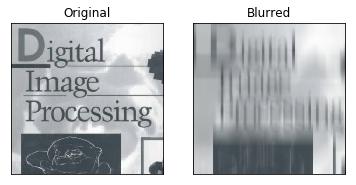

In [4]:
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(blurred),plt.title('Blurred')
plt.xticks([]),plt.yticks([])
plt.show()

# Part (b)

In [5]:
blurred = cv.filter2D(image,-1,motion_blur)

In [6]:
number_rows, number_columns = image.shape[:2]

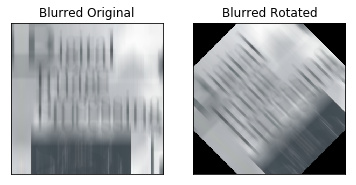

In [7]:
matrix_rotation = cv.getRotationMatrix2D((number_columns/2, number_rows/2),45,1)
blurred_rotation = cv.warpAffine(blurred, matrix_rotation, (number_columns, number_rows))
plt.subplot(121),plt.imshow(blurred),plt.title('Blurred Original')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(blurred_rotation),plt.title('Blurred Rotated')
plt.xticks([]),plt.yticks([])
plt.show()

# Part (c)

In [ ]:
img = blurred
gauss = np.random.normal(0,3,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
img_gauss = cv.add(img,gauss)
cv.imshow('Gaussian noise added',img_gauss)
cv.waitKey(1)
cv.imwrite("Guassian noise addded.jpg",img_gauss)

# Part (d)

In [13]:
changed = img_gauss
PSF = np.ones((5, 5)) / 25
filter = deconvwnr(changed,PSF,'same')
cv.imshow('Restored',filter)

NameError: name 'deconvwnr' is not defined